<h1> Backpropagation </h1>

In [ ]:
from data_loader import DataLoader 
from neural_network import NeuralNetwork
from visualizer import Visualizer
import tensorflow as tf
import numpy as np
import time
import random
SEED = 50
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [4]:
class Backpropagation:
    def __init__(self, model, data_loader, learning_rate=0.01, batch_size=32, epochs=50):
        self.model = model
        self.data_loader = data_loader
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.history = {
            'loss': [],
            'accuracy': [],
            'val_loss': [],
            'val_accuracy': []
        }
    
    def train(self):
        start_time = time.time()
        
        x_train, y_train, x_test, y_test = self.data_loader.get_data()
        n_samples = len(x_train)
        n_batches = int(np.ceil(n_samples / self.batch_size))
        
        print(f"Starting Backpropagation training for {self.epochs} epochs...")
        
        for epoch in range(self.epochs):
            # Shuffle training data
            indices = np.random.permutation(n_samples)
            x_shuffled = x_train[indices]
            y_shuffled = y_train[indices]
            
            epoch_loss = 0
            
            for batch in range(n_batches):
                # Get batch data
                start_idx = batch * self.batch_size
                end_idx = min((batch + 1) * self.batch_size, n_samples)
                x_batch = x_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]
                batch_size = end_idx - start_idx
                
                # Forward pass
                y_pred, hidden_output, hidden_input = self.model.forward(x_batch)
                batch_loss = self.model.cross_entropy(y_pred, y_batch)
                epoch_loss += batch_loss * batch_size
                
                # Backpropagation
                # Output layer error
                delta2 = y_pred - y_batch
                
                # Hidden layer error
                delta1 = (delta2 @ self.model.W2.T) * (hidden_output > 0)
                
                # Gradients
                dW2 = hidden_output.T @ delta2 / batch_size
                db2 = np.sum(delta2, axis=0) / batch_size
                dW1 = x_batch.T @ delta1 / batch_size
                db1 = np.sum(delta1, axis=0) / batch_size
                
                # Update weights
                self.model.W2 -= self.learning_rate * dW2
                self.model.b2 -= self.learning_rate * db2
                self.model.W1 -= self.learning_rate * dW1
                self.model.b1 -= self.learning_rate * db1
            
            # Calculate epoch metrics
            epoch_loss /= n_samples
            
            # Evaluate on training data
            train_loss, train_accuracy = self.model.evaluate(x_train, y_train)
            val_loss, val_accuracy = self.model.evaluate(x_test, y_test)
            
            # Store metrics
            self.history['loss'].append(train_loss)
            self.history['accuracy'].append(train_accuracy)
            self.history['val_loss'].append(val_loss)
            self.history['val_accuracy'].append(val_accuracy)
            
            if (epoch + 1) % 5 == 0 or epoch == 0:
                print(f"Epoch {epoch+1}/{self.epochs} - loss: {train_loss:.4f} - accuracy: {train_accuracy:.4f} - val_loss: {val_loss:.4f} - val_accuracy: {val_accuracy:.4f}")
        
        execution_time = time.time() - start_time
        
        final_train_loss, final_train_accuracy = self.model.evaluate(x_train, y_train)
        final_val_loss, final_val_accuracy = self.model.evaluate(x_test, y_test)
        
        result = {
            'best_loss': min(self.history['val_loss']),
            'final_loss': final_val_loss,
            'final_accuracy': final_val_accuracy,
            'total_iterations': self.epochs,
            'execution_time': execution_time,
            'history': self.history
        }
        
        return result

In [5]:
def run_backpropagation():
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    """Main function to run the Backpropagation algorithm"""
    print("Running Neural Network with Backpropagation...")
    
    # Initialize data loader
    data_loader = DataLoader()
    
    # Initialize neural network
    model = NeuralNetwork(input_dim=784, hidden_dim=32, output_dim=10)
    
    # Initialize backpropagation trainer
    bp_trainer = Backpropagation(model, data_loader, learning_rate=0.01, batch_size=32, epochs=50)
    
    # Train the model
    results = bp_trainer.train()
    
    # Save the model
    model.save_model('bp_model.pkl')
    
    # Visualize results
    visualizer = Visualizer(model, data_loader)
    visualizer.visualize_all(results)
    
    return model, results

Running Neural Network with Backpropagation...
Starting Backpropagation training for 50 epochs...
Epoch 1/50 - loss: 1.3999 - accuracy: 0.7022 - val_loss: 1.4084 - val_accuracy: 0.6929
Epoch 5/50 - loss: 0.5128 - accuracy: 0.8726 - val_loss: 0.5455 - val_accuracy: 0.8576
Epoch 10/50 - loss: 0.3631 - accuracy: 0.9054 - val_loss: 0.4160 - val_accuracy: 0.8858
Epoch 15/50 - loss: 0.3006 - accuracy: 0.9234 - val_loss: 0.3650 - val_accuracy: 0.8961
Epoch 20/50 - loss: 0.2684 - accuracy: 0.9298 - val_loss: 0.3457 - val_accuracy: 0.9006
Epoch 25/50 - loss: 0.2415 - accuracy: 0.9394 - val_loss: 0.3272 - val_accuracy: 0.9055
Epoch 30/50 - loss: 0.2211 - accuracy: 0.9454 - val_loss: 0.3149 - val_accuracy: 0.9079
Epoch 35/50 - loss: 0.2059 - accuracy: 0.9484 - val_loss: 0.3075 - val_accuracy: 0.9109
Epoch 40/50 - loss: 0.1919 - accuracy: 0.9510 - val_loss: 0.3013 - val_accuracy: 0.9128
Epoch 45/50 - loss: 0.1802 - accuracy: 0.9556 - val_loss: 0.2969 - val_accuracy: 0.9126
Epoch 50/50 - loss: 0.16

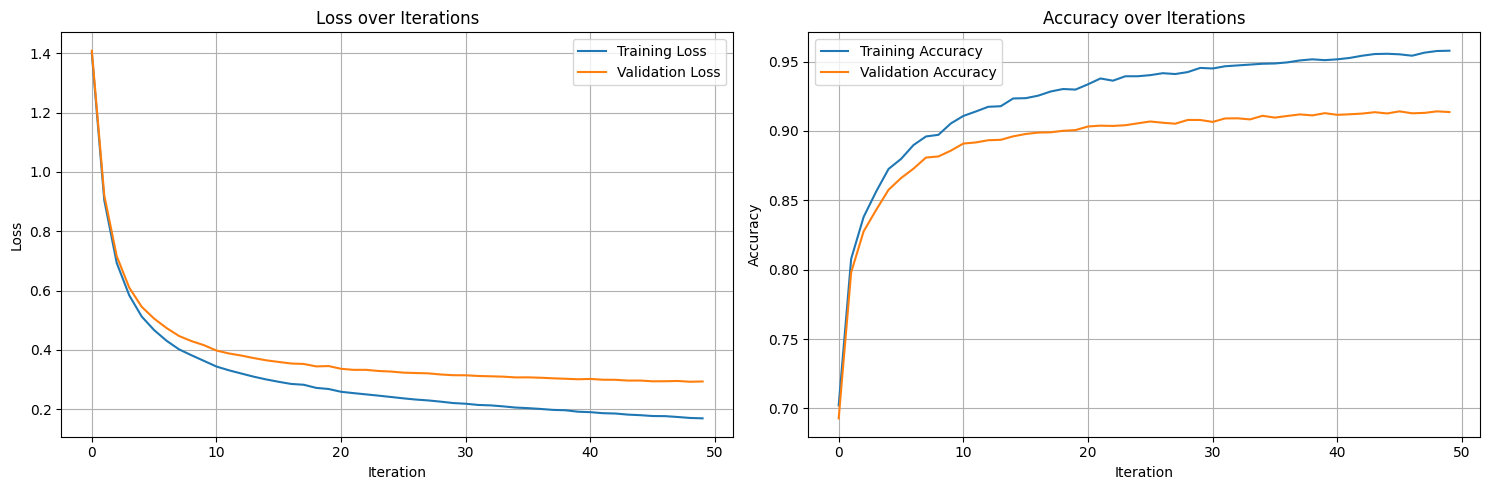

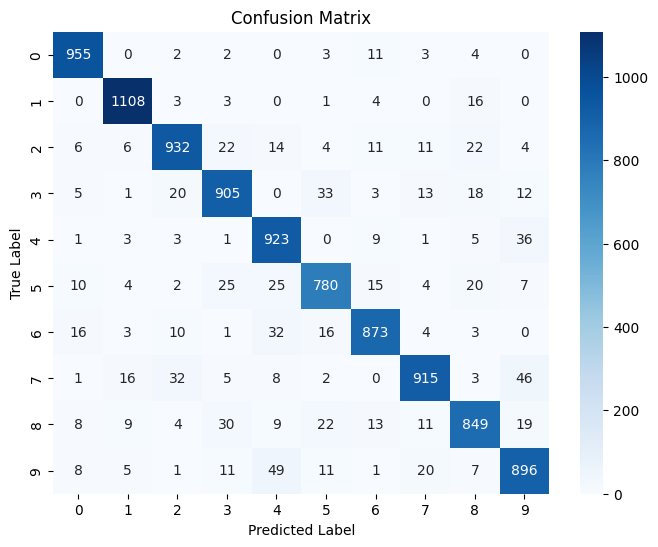

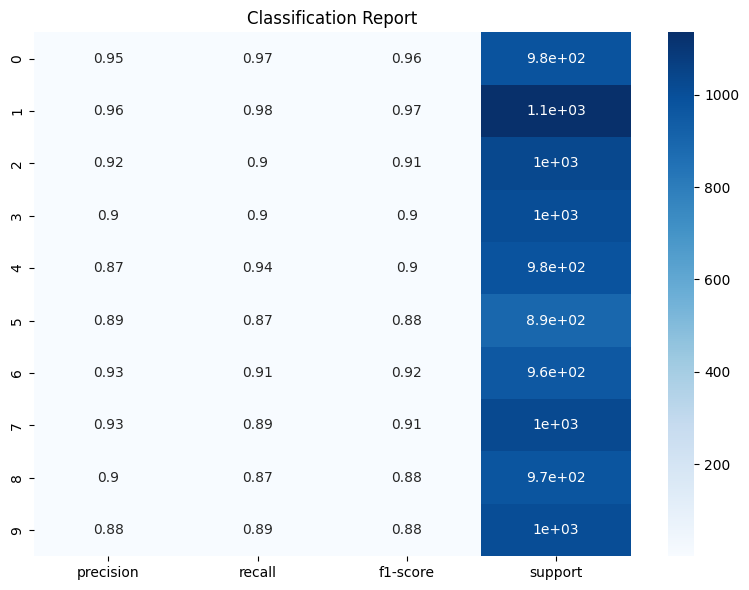

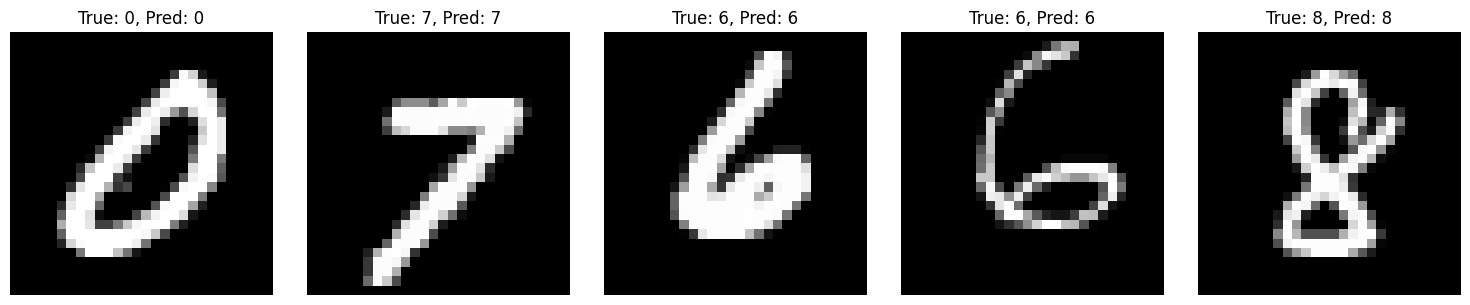

(<neural_network.NeuralNetwork at 0x23395e47d90>,
 {'best_loss': 0.2928801808586258,
  'final_loss': 0.2938403343330277,
  'final_accuracy': 0.9136,
  'total_iterations': 50,
  'execution_time': 32.77921485900879,
  'history': {'loss': [1.39990346468903,
    0.9044117727702851,
    0.6929187486941961,
    0.5842351841440138,
    0.5127581693416565,
    0.46687799960850973,
    0.43090901954868094,
    0.401955197608086,
    0.3820569650414303,
    0.36312221617669854,
    0.34411796158223834,
    0.3314439605822162,
    0.320523212213196,
    0.30979158969051157,
    0.3005909911644234,
    0.29261909678279446,
    0.2854128879778055,
    0.28273738006468146,
    0.27218171889573006,
    0.26843982745992806,
    0.25900060891149485,
    0.25450550995189986,
    0.2502705805368917,
    0.24605166748277899,
    0.24151605353512745,
    0.23690858384648728,
    0.23282590525687427,
    0.22984655367222212,
    0.22573480881906463,
    0.22105185371023137,
    0.2187879305251514,
    0.214

In [6]:
run_backpropagation()